# XGBoost

## O que é?

XGBoost é um modelo de aprendizado de máquina baseado no modelo Gradient Boosting. O modelo XGBoost têm sido amplamente utilizados em competições de aprendizado de máquina por trazer otimizações na utilização de software e hardware. É capaz de executar modelos em paralelo, o que o torna mais rápido quando comparado ao Gradient Boosting.

## Exemplo

###### Este exemplo foi feito seguindo o seguinte tutorial https://www.youtube.com/watch?v=GrJP9FLV3FE&t=183s

In [1]:
# importando dependências
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#### Importando dataset
Prever se um usuário irá deixar ou não de usar um serviço de telecom

#### Entendendo os dados
- customerID - Código de identificação do usuário
- gender - Gênero
- SeniorCitizen - Se o cidadão é considerado Sênior (>65 anos)
- Partner - Se o indivíduo é casado
- Dependents - Se possui dependentes
- tenure - numero de meses que o cliente está na companhia
- PhoneService - Se o cliente possui serviço de celular
- MultipleLines - Caso o cliente possua serviço de celular, se possui múltiplas linhas
- InternetService - serviço de internet (DLS, Fibra ótica ou não possui)
- OnlineSecurity - se o cliente possui segurança online
- OnlineBackup - se o cliente possui backup online
- DeviceProtection - se possui proteção ao aparelho
- TechSupport - Se o cliente possui suporte técnico
- Streaming TV - se o cliente possui serviço de streaming para TV
- StreamingMovies - se o cliente possui serviço de streaming de filmes
- Contract - tipo de contrato do cliente (mensal, anual, bi-anual)
- PaperlessBilling - Se o cliente possio faturamento sem papel ou não (????)
- PaymentMethod - método de pagamento
- MonthlyCharges - Valor cobrado mensalmente do cliente
- TotalCharges - Valor total cobrado do cliente
- Churn - se o cliente mudou de empresa ou não --- ALVO ---

In [20]:
df = pd.read_csv('Datasets/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# excluindo coluna customerID pois não será útil para previsões
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Em algumas colunas temos mais de uma palavra como "No phone service", é importante substituir os espaços brancos por '_'
columns_to_replace = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for c in columns_to_replace:
    df[c].replace(' ','_', regex=True, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


#### Tratando dados faltando

In [25]:
#verificando tipos dos dados
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
#verificando valores de cada coluna
df['TotalCharges'].unique() #Aqui há um problema pois TotalCharges deveria ser um conjunto de números, e cono visto em df.dtypes o tipo dessa coluna é "Object"

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
# o erro mostra que existem espaços brancos

ValueError: Unable to parse string " " at position 488

In [30]:
len(df.loc[df['TotalCharges']==' ']) ##Onze colunas com valores em branco

11

In [31]:
df.loc[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,,No


In [32]:
#como pode ser percebido através da coluna tenure, os clientes que não possuem valores em TotalCharges são os que acabaram de assinar o plano, sendo assim vamos trocar ' ' por 0
df.loc[(df['TotalCharges']==' '), 'TotalCharges'] = 0

#verificando se os valores foram alterados, printando clientes que não tem nenhum mês de uso (tenure = 0)
df.loc[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,0,No


In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Separando treino e teste

In [41]:
#Para facilitar, alterarei a coluna 'Churn' de 'No' para 0 e 'Yes' para 1
df.loc[(df['Churn']=='No'), 'Churn'] = 0
df.loc[(df['Churn']=='Yes'), 'Churn'] = 1
df['Churn'] = pd.to_numeric(df['Churn'])


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1


In [42]:
X = df.drop('Churn', axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65


In [43]:
y = df['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

###### #Probleminha
Muitas colunas descrevem dados categóricos, ou seja, um ou outro, por exemplo 'Male' ou 'Female' para a coluna 'gender', 'DSL', 'Fiber_optic' ou 'No' para 'InternetService'. É necessário converter estas informações em valores numéricos ou booleanos. Sendo assim praticarei a técnica 'One-hot-encoding' e a função get_dummies do pandas. Essa função divide as colunas de acordo com a categoria de cada uma, por exemplo, a coluna 'gender' será dividida em 'Male' e 'Female', a coluna 'Male' conterá valor 1 para clientes homens e 0 para mulheres, e a coluna 'Female' conterá valor 1 para clientes mulheres e 0 para homens

In [44]:
X_encoded = pd.get_dummies(X, columns=['gender',
                                        'Partner',
                                        'Dependents',
                                        'PhoneService',
                                        'MultipleLines',
                                        'InternetService',
                                        'OnlineSecurity',
                                        'OnlineBackup',
                                        'DeviceProtection',
                                        'TechSupport',
                                        'StreamingTV',
                                        'StreamingMovies',
                                        'Contract',
                                        'PaperlessBilling',
                                        'PaymentMethod'])
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [57]:
#Separando dados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)
#o parâmetro stratify faz com que a porcentagem de 1's e 0's nos dados de teste e treino sejam as mesmas
#### sum(y_test)/len(y_test) igual a sum(y_train)/len(y_train)

#### Aplicando XGBoost

In [60]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10, #Quantas árvores serão construídas após os resultados deixarem de crescer
            eval_metric = 'aucpr', #método de avaliação
            eval_set=[(X_test, y_test)]) #Conjunto de teste para avaliar o método de avaliação

[0]	validation_0-aucpr:0.63160
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680
[11]	validation_0-aucpr:0.63828
Stopping. Best iteration:
[1]	validation_0-aucpr:0.64538



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

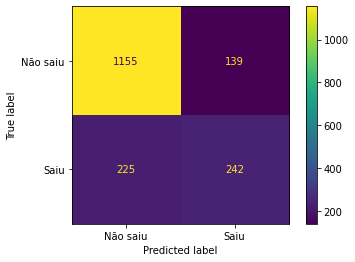

In [65]:
#Plotando confusion_matrix -> uma matriz 2x2 que analisa a quantidade de predições corretas e equivocadas feitas pelo modelo
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Não saiu","Saiu"])

79% de acertos aproximadamente

#### Agora sim!! OTIMIZANDO HIPERPARÂMETROS!!!!!

In [68]:
#Criando grade de hyperparametros

param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [1, 0.5, 0.1, 0.05],
    'gamma': [0, 0.25, 0.5, 1],
    'reg_lambda': [0, 1, 10, 20, 100],
    'scale_pos_weight': [1,3,5] #tipo de penalidade utilizada nas classificações erradas
}

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='binary:logistic', 
                                  seed=42,
                                  subsample=0.9, #Cada árvore utilizará apenas 90% dos dados de treino
                                  colsample_bytree = 0.5), #Cada árvore utilizará apenas 50% das colunas (reduzir overfitting)
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train,
                y_train,
                verbose=True,
                early_stopping_rounds=10, 
                eval_metric = 'auc', 
                eval_set=[(X_test, y_test)])

print(optimal_params.best_params_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   48.2s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   57.1s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 2160 out of 2160 | elapsed:  5.0min finished


[0]	validation_0-auc:0.78255
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.81980
[2]	validation_0-auc:0.82225
[3]	validation_0-auc:0.82159
[4]	validation_0-auc:0.82069
[5]	validation_0-auc:0.83183
[6]	validation_0-auc:0.83311
[7]	validation_0-auc:0.83656
[8]	validation_0-auc:0.83726
[9]	validation_0-auc:0.83817
[10]	validation_0-auc:0.83927
[11]	validation_0-auc:0.83959
[12]	validation_0-auc:0.84030
[13]	validation_0-auc:0.84037
[14]	validation_0-auc:0.84133
[15]	validation_0-auc:0.84189
[16]	validation_0-auc:0.84243
[17]	validation_0-auc:0.84291
[18]	validation_0-auc:0.84306
[19]	validation_0-auc:0.84279
[20]	validation_0-auc:0.84349
[21]	validation_0-auc:0.84394
[22]	validation_0-auc:0.84378
[23]	validation_0-auc:0.84427
[24]	validation_0-auc:0.84493
[25]	validation_0-auc:0.84474
[26]	validation_0-auc:0.84488
[27]	validation_0-auc:0.84470
[28]	validation_0-auc:0.84501
[29]	validation_0-auc:0.84573
[30]	validation_0-auc:0.84613
[31]	validation_

#### Criando o modelo otimizado

In [73]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            seed=42,
                            gamma = 0,
                            learning_rate = 0.1,
                            max_depth = 3,
                            reg_lambda = 20,
                            scale_pos_weight = 1,
                            subsample=0.9,
                            colsample_bytree=0.5)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10, 
            eval_metric = 'aucpr', 
            eval_set=[(X_test, y_test)]) 

[0]	validation_0-aucpr:0.50086
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.58410
[2]	validation_0-aucpr:0.59334
[3]	validation_0-aucpr:0.59535
[4]	validation_0-aucpr:0.59123
[5]	validation_0-aucpr:0.60207
[6]	validation_0-aucpr:0.61123
[7]	validation_0-aucpr:0.61670
[8]	validation_0-aucpr:0.61752
[9]	validation_0-aucpr:0.61632
[10]	validation_0-aucpr:0.62477
[11]	validation_0-aucpr:0.63588
[12]	validation_0-aucpr:0.63708
[13]	validation_0-aucpr:0.63982
[14]	validation_0-aucpr:0.63465
[15]	validation_0-aucpr:0.63452
[16]	validation_0-aucpr:0.63457
[17]	validation_0-aucpr:0.64228
[18]	validation_0-aucpr:0.64267
[19]	validation_0-aucpr:0.63960
[20]	validation_0-aucpr:0.64009
[21]	validation_0-aucpr:0.64294
[22]	validation_0-aucpr:0.64385
[23]	validation_0-aucpr:0.64591
[24]	validation_0-aucpr:0.64610
[25]	validation_0-aucpr:0.64526
[26]	validation_0-aucpr:0.64572
[27]	validation_0-aucpr:0.64504
[28]	validation_0-aucpr:0.64673
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=20, scale_pos_weight=1, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

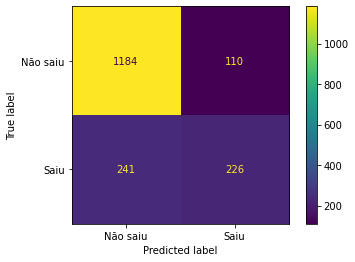

In [74]:
#Plotando confusion_matrix
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Não saiu","Saiu"])

### Exemplo para regressão

In [76]:
from sklearn.datasets import make_regression

In [77]:
#Gera regressão com valores aleatórios, 1000 linhas e 4 colunas além da variável alvo
X, y = make_regression(n_samples = 1000, n_features = 4, shuffle = True, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [79]:
reg_xgb = xgb.XGBRegressor()
reg_xgb.fit(X_train, y_train)

print(reg_xgb.score(X_test, y_test))

0.9366907284357832


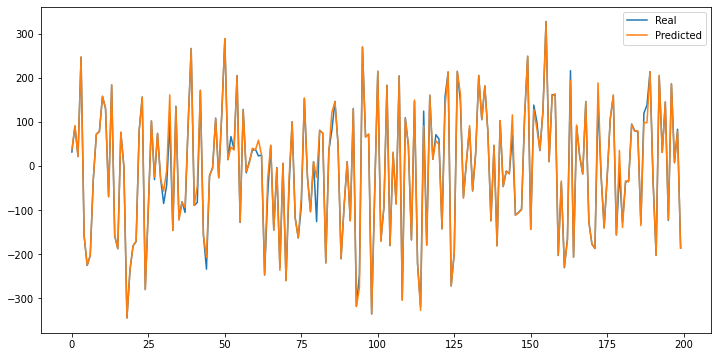

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y[800:], label='Real')
plt.plot(reg_xgb.predict(X)[800:], label='Predicted')
plt.legend()
plt.show()

### Ações do facebook

In [81]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 1, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,10)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)

#Separando treino e teste
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4','Close 5','Close 6','Close 7','Close 8','Close 9']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

In [104]:
reg_xgb = xgb.XGBRegressor(learning_rate=0.1, gamma=0.2, random_state=42)
reg_xgb.fit(X_train, Y_train)

Y_pred = reg_xgb.predict(X_test)

print(reg_xgb.score(X_test, Y_test))

0.9720133126320734


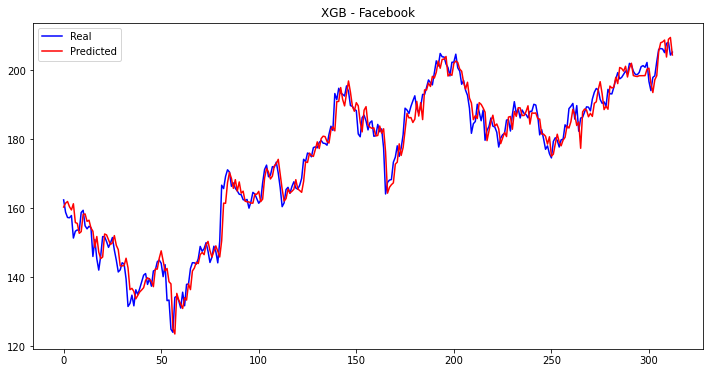

In [105]:
plt.figure(figsize=(12,6))
plt.title('XGB - Facebook')

plt.plot(Y_test, color='blue', label='Real')
plt.plot(Y_pred, color='red', label='Predicted')

plt.legend()
plt.show()